# Multi-class Handwritten Digit Recognition Using Neural Networks

In this project, I will use a neural network to recognize the hand-written digits 0-9.

## Import and Libraries 

First, let's run the cell below to import all the packages that I will need during this project.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from keras.losses import SparseCategoricalCrossentropy 
from keras.optimizers import Adam
import warnings


sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

## Softmax Function as the Output Layer
A multiclass neural network generates N outputs. One output is selected as the predicted answer. In the output layer, a vector $\mathbf{z}$ is generated by a linear function which is fed into a softmax function. The softmax function converts $\mathbf{z}$  into a probability distribution as described below. After applying softmax, each output will be between 0 and 1 and the outputs will sum to 1. They can be interpreted as probabilities. The larger inputs to the softmax will correspond to larger output probabilities.
<center>  <img  src="image1.PNG" width="600" />   

The softmax function can be written:
$$a_j = \frac{e^{z_j}}{ \sum_{k=0}^{N-1}{e^{z_k} }} \tag{1}$$

Where $z = \mathbf{w} \cdot \mathbf{x} + b$ and N is the number of feature/categories in the output layer.  

## Neural Networks

In this project, I intend to implemented a neural network to do multiclass classification by utilizing the softmax activation function.


### Problem Statement

Here, I will use a neural network to recognize ten handwritten digits, 0-9. This is a multiclass classification task where one of n choices is selected. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. 


### Dataset

I will start by loading the dataset for this task. 
- The `load_data()` function shown below loads the data into variables `X` and `y`


- The data set contains 5000 training examples of handwritten digits $^1$.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit. 
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. 
        - Each training examples becomes a single row in our data matrix `X`. 
        - This gives us a 5000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

- The second part of the training set is a 5000 x 1 dimensional vector `y` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 4` if the image is of the digit `4` and so on.

$^1$<sub> This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)</sub>

In [2]:
def load_data():
    X = np.load("X.npy")
    y = np.load("y.npy")
    return X, y

In [3]:
# load dataset
X, y = load_data()

In [4]:
print (f'The first element of X is: {X[0]}')

The first element of X is: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+0

In [5]:
print (f'The first element of y is: {y[0][0]}')
print (f'The last element of y is: {y[-1][0]}')

The first element of y is: 0
The last element of y is: 9


#### Checking the dimensions of data

Another way to get familiar with data is to view its dimensions. 

In [6]:
print (f'The shape of X is: {(X.shape)}')
print (f'The shape of y is: {(y.shape)}')

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


#### Visualizing the Data

I will begin by visualizing a subset of the training set. 
- In the cell below, the code randomly selects 64 rows from `X`, maps each row back to a 20 pixel by 20 pixel grayscale image and displays the images together. 
- The label for each image is displayed above the image 

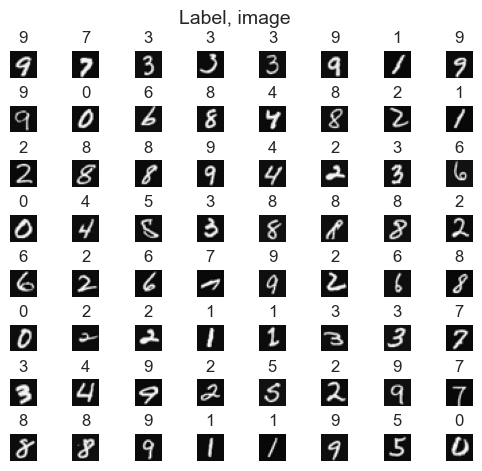

In [7]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False
#fig.tight_layout(pad=0.5)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

### Model representation

The neural network I used in this task is shown in the figure below. 
- This has two dense layers with ReLU activations followed by an output layer with a linear activation. 
    - Recall that our inputs are pixel values of digit images.
    - Since the images are of size $20\times20$, this gives us $400$ inputs  
    
<img src="image2.png" width="600" height="450">

## Note that the output layer of linear was chosen intentionally as I wanted to reduce the Round Off error. Although it may look abnormal, I will address this issue in the next steps with further explanation...!

- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $10$ output units in layer 3, one for each digit.

    - Recall that the dimensions of these parameters is determined as follows:
        - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then 
            - $W$ will be of dimension $s_{in} \times s_{out}$.
            - $b$ will be a vector with $s_{out}$ elements
  
    - Therefore, the shapes of `W`, and `b`,  are 
        - layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,)
        - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
        - layer3: The shape of `W3` is (15, 10) and the shape of `b3` is: (10,)
>**Note:** The bias vector `b` could be represented as a 1-D (n,) or 2-D (n,1) array. Tensorflow utilizes a 1-D representation and this project will maintain that convention: 

### Tensorflow Model Implementation

Tensorflow models are built layer by layer. A layer's input dimensions ($s_{in}$ above) are calculated. I specify a layer's *output dimensions* and this determines the next layer's input dimension. The input dimension of the first layer is derived from the size of the input data specified in the `model.fit` statement below. 
>**Note:** It is also possible to add an input layer that specifies the input dimension of the first layer. For example:  
`tf.keras.Input(shape=(400,)),    #specify input shape`  
I will include that here to illuminate some model sizing.

### Softmax placement
As described above, numerical stability is improved if the softmax is grouped with the loss function rather than the output layer during training. This has implications when *building* the model and *using* the model.  
Building:  
* The final Dense layer will use a 'linear' activation. This is effectively no activation. 
* The `model.compile` statement will indicate this by including `from_logits=True`.
`loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) `  
* This does not impact the form of the target. In the case of SparseCategorialCrossentropy, the target is the expected digit, 0-9.

Using the model:
* The outputs are not probabilities. If output probabilities are desired, apply a softmax function.

### Model Construction

Below, using Keras Sequential model and Dense Layer with a ReLU activation, I will construct the three layer network described above.

In [8]:
tf.random.set_seed(1234) # for consistent results

model = Sequential(
    [               
        tf.keras.Input(shape=(400,)),
        Dense(units=25, activation='relu', name='Hidden_Layer_1'),
        Dense(units=15, activation='relu', name='Hidden_Layer_2'),
        Dense(units=10, activation='linear', name='Output_Layer'),
    ], name = "Deep_Learning_Model" 
)

In [9]:
model.summary()

Model: "Deep_Learning_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 25)                10025     
                                                                 
 Hidden_Layer_2 (Dense)      (None, 15)                390       
                                                                 
 Output_Layer (Dense)        (None, 10)                160       
                                                                 
Total params: 10575 (41.31 KB)
Trainable params: 10575 (41.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The parameter counts shown in the summary correspond to the number of elements in the weight and bias arrays as shown below.
Let's further examine the weights to verify that tensorflow produced the same dimensions as I calculated above.

In [10]:
[layer1, layer2, layer3] = model.layers

#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In the following code:
* I want to defines a loss function, `SparseCategoricalCrossentropy` and indicate the softmax should be included with the loss calculation by adding `from_logits=True`)
* I want to define an optimizer (Adaptive Moment (Adam)).

In [11]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=40
)

Epoch 1/40
157/157 [==============================] - 0s 367us/step - loss: 1.4666
Epoch 2/40
157/157 [==============================] - 0s 316us/step - loss: 0.5993
Epoch 3/40
157/157 [==============================] - 0s 316us/step - loss: 0.4116
Epoch 4/40
157/157 [==============================] - 0s 316us/step - loss: 0.3346
Epoch 5/40
157/157 [==============================] - 0s 317us/step - loss: 0.2926
Epoch 6/40
157/157 [==============================] - 0s 317us/step - loss: 0.2622
Epoch 7/40
157/157 [==============================] - 0s 320us/step - loss: 0.2376
Epoch 8/40
157/157 [==============================] - 0s 318us/step - loss: 0.2182
Epoch 9/40
157/157 [==============================] - 0s 316us/step - loss: 0.2016
Epoch 10/40
157/157 [==============================] - 0s 315us/step - loss: 0.1833
Epoch 11/40
157/157 [==============================] - 0s 316us/step - loss: 0.1704
Epoch 12/40
157/157 [==============================] - 0s 316us/step - loss: 0.1598
E

#### Epochs and batches
In the `compile` statement above, the number of `epochs` was set to 40. This specifies that the entire data set should be applied during training 100 times.  During training, I can see output describing the progress of training that looks like this:
```
Epoch 1/100
157/157 [==============================] - 0s 1ms/step - loss: 2.2770
```
The first line, `Epoch 1/100`, describes which epoch the model is currently running. For efficiency, the training data set is broken into 'batches'. The default size of a batch in Tensorflow is 32. There are 5000 examples in our data set or roughly 157 batches. The notation on the 2nd line `157/157 [====` is describing which batch has been executed.

#### Loss  (cost)
Now, I want to track the progress of gradient descent by monitoring the cost. Ideally, the cost will decrease as the number of iterations of the algorithm increases. Tensorflow refers to the cost as `loss`. Above, I saw the loss displayed each epoch as `model.fit` was executing. The .fit method returns a variety of metrics including the loss. This is captured in the `history` variable above. This can be used to examine the loss in a plot as shown below.

In [12]:
loss = pd.DataFrame(data=history.history, columns=['loss'])

In [13]:
loss

,loss
0,1.466635
1,0.599286
2,0.411588
3,0.334609
4,0.292615
5,0.262190
6,0.237601
7,0.218224
8,0.201588
9,0.183314


<Axes: >

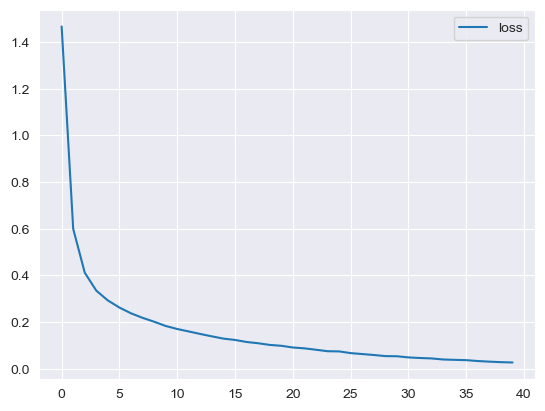

In [14]:
sns.lineplot(data=loss)

#### Prediction 
To make a prediction I will predict X[1015] contains an image of a two.

In [15]:
def display_digit(X):
    """ display a single digit. The input is one digit (400,). """
    fig, ax = plt.subplots(1,1, figsize=(0.5,0.5))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    X_reshaped = X.reshape((20,20)).T
    # Display the image
    ax.imshow(X_reshaped, cmap='gray')
    plt.show()

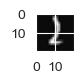

1/1 [==============================] - 0s 26ms/step
 predicting a Two: 
[[ -5.0242786   4.2643256   5.6694217   3.6362617 -10.151278   -4.895997
   -6.5011992   3.3686888  -1.9164689  -1.3714365]]


 Largest Prediction index: 2


In [16]:
image_of_two = X[1015]
display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1,400))  # prediction

print(f" predicting a Two: \n{prediction}")
print('\n')
print(f" Largest Prediction index: {np.argmax(prediction)}")

The largest output is prediction[2], indicating the predicted digit is a '2'.

In [17]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[1.5351246e-05 1.6600968e-01 6.7664188e-01 8.8586740e-02 9.1099565e-08
  1.7452436e-05 3.5053015e-06 6.7789637e-02 3.4343803e-04 5.9231534e-04]]
Total of predictions: 1.000


To return an integer representing the predicted target, you want the index of the largest probability.

In [18]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 2


1/1 [==============================] - 0s 6ms/step


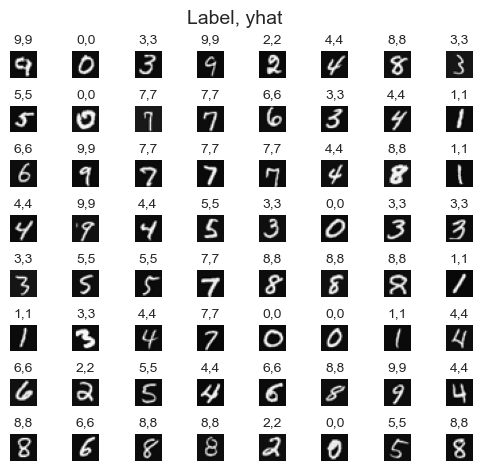

In [19]:
m, n = X.shape


fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

Let's look at some of the errors. 
>Note: increasing the number of training epochs can eliminate the errors on this data set.

In [22]:
def display_errors(model,X,y):
    f = model.predict(X)
    yhat = np.argmax(f, axis=1)
    doo = yhat != y[:,0]
    idxs = np.where(yhat != y[:,0])[0]
    if len(idxs) == 0:
        print("no errors found")
    else:
        cnt = min(8, len(idxs))
        fig, ax = plt.subplots(1,cnt, figsize=(5,1.2))
        fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.80]) #[left, bottom, right, top]
        
        
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False

        for i in range(cnt):
            j = idxs[i]
            X_reshaped = X[j].reshape((20,20)).T

            # Display the image
            ax[i].imshow(X_reshaped, cmap='gray')

            # Predict using the Neural Network
            prediction = model.predict(X[j].reshape(1,400))
            prediction_p = tf.nn.softmax(prediction)
            yhat = np.argmax(prediction_p)

            # Display the label above the image
            ax[i].set_title(f"{y[j,0]},{yhat}",fontsize=10)
            ax[i].set_axis_off()
            fig.suptitle("Label, yhat", fontsize=12)
    return(len(idxs))

1/1 [==============================] - 0s 6ms/step
14 errors out of 5000 images


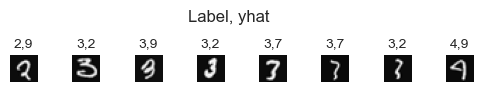

In [23]:
print( f"{display_errors(model,X,y)} errors out of {len(X)} images")

# Result:

As can be shown, achieved the accuracy of 99.5% on the training set. Here, I do not want to test the model on new unseen data. But as shown, model was successful to recognize handwritten numbers. Interestingly, if I increase the number of epochs, the model can achieve 100% of accuracy on training set, but probably suffers from overfitting.

So, I keep the number of epochs or other hyperparameter unchanged.